In [1]:
import imports
import utils

/Users/ali/Desktop/Business_Analytics_Final_Project/utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_df['Result'] = 0
/Users/ali/Desktop/Business_Analytics_Final_Project/utils.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(one_df)


In [2]:
df=imports.pd.read_excel('phising-uci-dataset.xlsx')

Defining Training and Testing Set for Classification

In [3]:
X= df[['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report']]

y=df['Result']

X_train, X_test, y_train, y_test = imports.train_test_split(X,y, test_size=0.2, random_state = 42)

Logistic Regression

In [4]:
logreg=imports.LogisticRegression(random_state=42)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [5]:
cnf_matrix = imports.metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1013,    0],
       [   4,  943]])

In [6]:
target_names = ['Not phishing', 'Phishing']
print(imports.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not phishing       1.00      1.00      1.00      1013
    Phishing       1.00      1.00      1.00       947

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



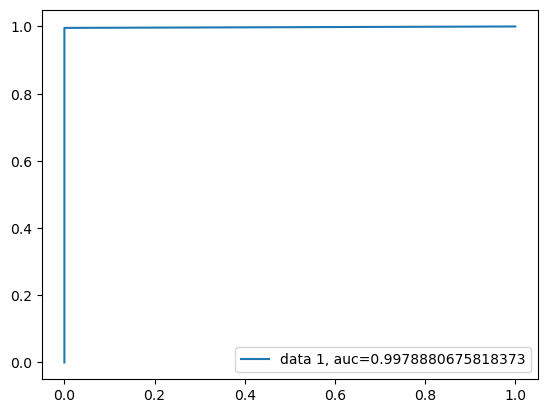

In [7]:
# Calculate ROC curve and AUC
fpr, tpr, _ = imports.metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = imports.metrics.roc_auc_score(y_test, y_pred)

# Plot ROC curve
# Convert AUC value to string before concatenating
imports.plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))

imports.plt.legend(loc=4)
imports.plt.show()
